EXP 5: 	Design and implement a CNN model to classify multi category tiff images with tensorflow /
keras and check the accuracy. Check whether your model is overfit / underfit / perfect fit and apply the techniques to avoid overfit and underfit like  dropouts etc.


To create a Convolutional Neural Network (CNN) model to classify multi-category .tiff images, we can use TensorFlow and Keras. Here’s a step-by-step guide with code and explanations.
you can convert another dataset to .tiff format(Tagged Image File Format) if necessary.
To convert the CIFAR-10 dataset to .tiff images, you can use the PIL library to save each image from the dataset in .tiff format. Here’s a step-by-step guide using Python.
Steps to Convert CIFAR-10 to .tiff Format
1.	Load CIFAR-10 Dataset: CIFAR-10 is available in Keras, so we’ll load it using tf.keras.datasets.
2.	Loop Through the Dataset: Iterate over each image and label in the dataset.
3.	Save Each Image as .tiff: Use the PIL.Image module to save each image in .tiff format.


In [1]:
import os
import numpy as np
from tensorflow.keras.datasets import cifar10
from PIL import Image
import warnings
#warnings.filterwarnings('ignore')
# Create directories to save the images
train_dir = 'cifar10_tiff/train'
test_dir = 'cifar10_tiff/test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Helper function to save images in .tiff format
def save_images(images, labels, directory):
    for i, (image_array, label) in enumerate(zip(images, labels)):
        # Convert numpy array to PIL image
        image = Image.fromarray(image_array)

        # Define the label name
        label_name = class_labels[int(label)]

        # Create a subdirectory for each class
        label_dir = os.path.join(directory, label_name)
        os.makedirs(label_dir, exist_ok=True)

        # Save the image in .tiff format
        image_path = os.path.join(label_dir, f"{label_name}_{i}.tiff")
        image.save(image_path, format='TIFF')

# Save training and test images as .tiff
save_images(x_train, y_train, train_dir)
save_images(x_test, y_test, test_dir)

print("Images have been successfully saved as .tiff files.")

C:\Users\sudik\AppData\Local\Temp\ipykernel_19620\1145066886.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_name = class_labels[int(label)]


Images have been successfully saved as .tiff files.


After converting the CIFAR-10 dataset images to .tiff format, you can load these .tiff images and use a CNN to classify them. Here's a complete code that demonstrates this:

Step 1: Set Up Libraries and Import Modules

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Step 2: Define Data Directories and Data Generator
Assuming that the .tiff images are saved in folders like cifar10_tiff/train and cifar10_tiff/test, with subdirectories for each class (e.g., airplane, automobile, etc.).

In [3]:
# Set paths
train_dir = 'cifar10_tiff/train'
test_dir = 'cifar10_tiff/test'

# Define ImageDataGenerator with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% of training data for validation
)

# Define ImageDataGenerator for the test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training data
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(32, 32),  # CIFAR-10 images are 32x32 pixels
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

C:\Users\sudik\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:146: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


Step 3: Build the CNN Model
Define a CNN model suitable for classifying the CIFAR-10 images.

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\sudik\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

Step 4: Train the Model with Early Stopping
Train the model on the .tiff images, using early stopping to avoid overfitting.

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
 #if patience=5, training will continue for up to 5 epochs without improvement in val_loss. If there’s still no improvement after 5 epochs, training stops.
 #This is helpful to avoid stopping too early if there’s a chance for improvement.


 #When set to True, this parameter restores the model weights to those from the epoch with the best performance on the monitored metric (here, val_loss).
 #This ensures that the model doesn’t retain the weights from the last epoch, which may not be the best
history = model.fit(train_data,validation_data=validation_data,epochs=5,callbacks=[early_stopping])

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 363s 291ms/step - accuracy: 0.5442 - loss: 1.2737 - val_accuracy: 0.5788 - val_loss: 1.1766
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 149s 119ms/step - accuracy: 0.5552 - loss: 1.2482 - val_accuracy: 0.5957 - val_loss: 1.1491
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.5657 - loss: 1.2293 - val_accuracy: 0.6297 - val_loss: 1.0682
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.5751 - loss: 1.1952 - val_accuracy: 0.6252 - val_loss: 1.0844
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.5766 - loss: 1.1984 - val_accuracy: 0.6190 - val_loss: 1.0989


Step 5: Evaluate the Model
Check model performance on the test dataset and plot accuracy and loss.

313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.6390 - loss: 1.0048
Test accuracy: 65.19%


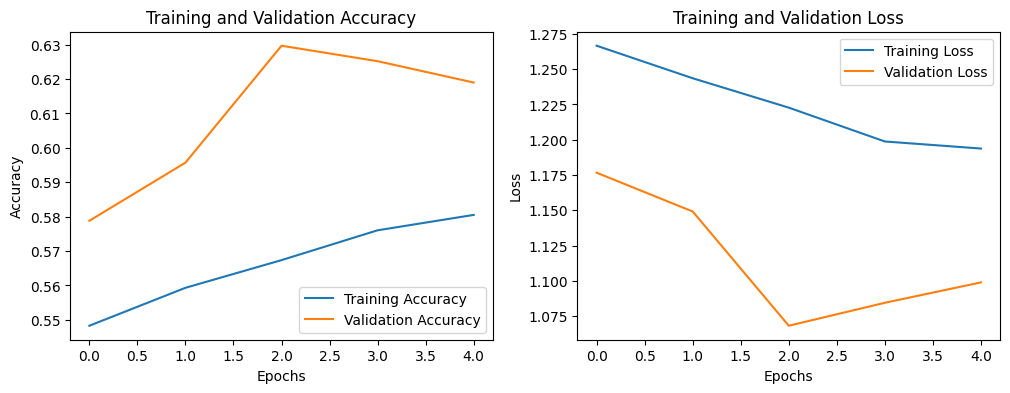

In [9]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

Step 6: Make Predictions (Optional)
You can use the trained model to make predictions on individual images or batches of images.


In [7]:
# Get predictions
predictions = model.predict(test_data)
predicted_classes = tf.argmax(predictions, axis=1)

# Actual classes from the test data generator
true_classes = test_data.classes

# Accuracy by comparing predicted and actual classes
accuracy = np.mean(predicted_classes == true_classes)
print(f"Prediction accuracy on test set: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
Prediction accuracy on test set: 61.22%


In [10]:
# Print actual and predicted classes
print("Actual classes:", true_classes)
print("Predicted classes:", predicted_classes.numpy())


Actual classes: [0 0 0 ... 9 9 9]
Predicted classes: [4 0 0 ... 9 9 9]


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)




Classification Report:
              precision    recall  f1-score   support

    airplane       0.76      0.50      0.61      1000
  automobile       0.80      0.77      0.78      1000
        bird       0.47      0.45      0.46      1000
         cat       0.41      0.47      0.44      1000
        deer       0.65      0.35      0.46      1000
         dog       0.56      0.48      0.51      1000
        frog       0.56      0.84      0.67      1000
       horse       0.59      0.73      0.66      1000
        ship       0.67      0.79      0.73      1000
       truck       0.76      0.73      0.75      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000

[[502  31 110  22  14   9  19  34 217  42]
 [  8 765   4  15   2   5  35  16  51  99]
 [ 58   6 454 120  44  73 148  66  24   7]
 [  2   6  70 473  35 159 157  70  15  13]
 [ 16   3 157  82 352  39 171 162  15   3]
 [

C:\Users\sudik\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3264 - loss: 1.8296 - val_accuracy: 0.5445 - val_loss: 1.3215
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5322 - loss: 1.3192 - val_accuracy: 0.6141 - val_loss: 1.1366
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5833 - loss: 1.1717 - val_accuracy: 0.6332 - val_loss: 1.0573
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6165 - loss: 1.0985 - val_accuracy: 0.6345 - val_loss: 1.0405
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6369 - loss: 1.0362 - val_accuracy: 0.6704 - val_loss: 0.9587
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6551 - loss: 0.9791 - val_accuracy: 0.6702 - val_loss: 0.9422
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6718 - loss: 0.9315 - val_accuracy: 0.6940 - val_loss: 0.9047
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6828 - loss: 0

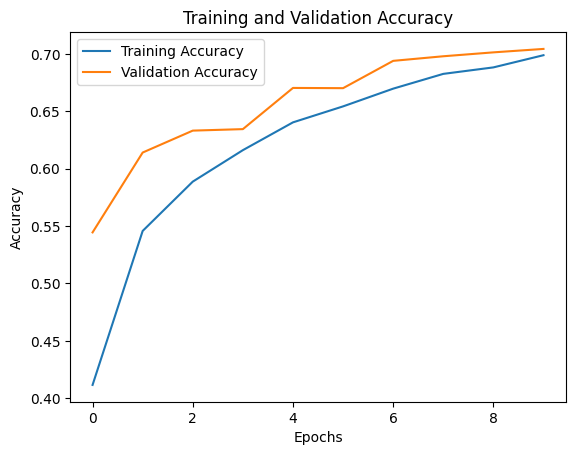

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6981 - loss: 0.8592
Test Accuracy :70.08%


In [1]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
def cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate and compile the model
model = cnn()

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Plot Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy :{accuracy*100:.2f}%")


In [ ]:
model.summary()
